In [6]:
!pip install -U mplsoccer
!pip install statsbombpy

In [40]:
from statsbombpy import sb
import pandas as pd
from mplsoccer import Pitch,Sbopen
import matplotlib.pyplot as plt

In [41]:
comps = sb.competitions()
comps['competition_name'].unique()


array(['1. Bundesliga', 'African Cup of Nations', 'Champions League',
       'Copa del Rey', "FA Women's Super League", 'FIFA U20 World Cup',
       'FIFA World Cup', 'Indian Super league', 'La Liga',
       'Liga Profesional', 'Ligue 1', 'Major League Soccer',
       'North American League', 'NWSL', 'Premier League', 'Serie A',
       'UEFA Euro', 'UEFA Europa League', "UEFA Women's Euro",
       "Women's World Cup"], dtype=object)

In [42]:
comps[comps['competition_name']=='African Cup of Nations']

competition_id  season_id country_name        competition_name  \
1            1267        107       Africa  African Cup of Nations   

  competition_gender  competition_youth  competition_international  \
1               male              False                       True   

  season_name               match_updated match_updated_360  \
1        2023  2024-02-14T05:41:27.566989              None   

  match_available_360             match_available  
1                None  2024-02-14T05:41:27.566989

In [43]:
matches = sb.matches(competition_id=1267, season_id=107)
matches[matches['home_team']=='Nigeria']

match_id  match_date      kick_off                      competition  \
0    3923881  2024-02-11  22:00:00.000  Africa - African Cup of Nations   
3    3922837  2024-02-07  19:00:00.000  Africa - African Cup of Nations   
10   3922321  2024-02-02  19:00:00.000  Africa - African Cup of Nations   
15   3922238  2024-01-27  22:00:00.000  Africa - African Cup of Nations   
17   3920386  2024-01-14  16:00:00.000  Africa - African Cup of Nations   

   season home_team          away_team  home_score  away_score match_status  \
0    2023   Nigeria      Côte d'Ivoire           1           2    available   
3    2023   Nigeria       South Africa           1           1    available   
10   2023   Nigeria             Angola           1           0    available   
15   2023   Nigeria           Cameroon           2           0    available   
17   2023   Nigeria  Equatorial Guinea           1           1    available   

    ... last_updated_360 match_week competition_stage  \
0   ...             None          8             Final   
3   ...             None          6       Semi-finals   
10  ...             None          5    Quarter-finals   
15  ...             None          4       Round of 16   
17  ...             None          1       Group Stage   

                               stadium            referee  \
0    Stade Olympique Alassane Ouattara       Dahane Beida   
3                      Stade de Bouaké  Amin Mohamed Omar   
10  Stade Félix Houphouët-Boigny                  Issa Sy   
15  Stade Félix Houphouët-Boigny           Redouane Jiyed   
17   Stade Olympique Alassane Ouattara       Abongile Tom   

                    home_managers                    away_managers  \
0   José Vítor dos Santos Peseiro                       Emerse Faé   
3   José Vítor dos Santos Peseiro                 Hugo Henri Broos   
10  José Vítor dos Santos Peseiro  Pedro Valdemar Soares Gonçalves   
15  José Vítor dos Santos Peseiro            Rigobert Song Bahanag   
17  José Vítor dos Santos Peseiro         Juan Micha Obiang Bicogo   

   data_version shot_fidelity_version xy_fidelity_version  
0         1.1.0                     2                   2  
3         1.1.0                     2                   2  
10        1.1.0                     2                   2  
15        1.1.0                     2                   2  
17        1.1.0                     2                   2  

[5 rows x 22 columns]

In [44]:
event = sb.events(match_id=3923881)
event

50_50 bad_behaviour_card ball_receipt_outcome ball_recovery_offensive  \
0      NaN                NaN                  NaN                     NaN   
1      NaN                NaN                  NaN                     NaN   
2      NaN                NaN                  NaN                     NaN   
3      NaN                NaN                  NaN                     NaN   
4      NaN                NaN                  NaN                     NaN   
...    ...                ...                  ...                     ...   
2694   NaN                NaN                  NaN                     NaN   
2695   NaN                NaN                  NaN                     NaN   
2696   NaN                NaN                  NaN                     NaN   
2697   NaN                NaN                  NaN                     NaN   
2698   NaN                NaN                  NaN                     NaN   

     ball_recovery_recovery_failure block_offensive carry_end_location  \
0                               NaN             NaN                NaN   
1                               NaN             NaN                NaN   
2                               NaN             NaN                NaN   
3                               NaN             NaN                NaN   
4                               NaN             NaN                NaN   
...                             ...             ...                ...   
2694                            NaN             NaN                NaN   
2695                            NaN             NaN                NaN   
2696                            NaN             NaN                NaN   
2697                            NaN             NaN                NaN   
2698                            NaN             NaN                NaN   

     clearance_aerial_won clearance_body_part clearance_head  ...  \
0                     NaN                 NaN            NaN  ...   
1                     NaN                 NaN            NaN  ...   
2                     NaN                 NaN            NaN  ...   
3                     NaN                 NaN            NaN  ...   
4                     NaN                 NaN            NaN  ...   
...                   ...                 ...            ...  ...   
2694                  NaN                 NaN            NaN  ...   
2695                  NaN                 NaN            NaN  ...   
2696                  NaN                 NaN            NaN  ...   
2697                  NaN                 NaN            NaN  ...   
2698                  NaN                 NaN            NaN  ...   

     substitution_outcome substitution_outcome_id   substitution_replacement  \
0                     NaN                     NaN                        NaN   
1                     NaN                     NaN                        NaN   
2                     NaN                     NaN                        NaN   
3                     NaN                     NaN                        NaN   
4                     NaN                     NaN                        NaN   
...                   ...                     ...                        ...   
2694             Tactical                   103.0  Jean Thierry Lazare Amani   
2695                  NaN                     NaN                        NaN   
2696                  NaN                     NaN                        NaN   
2697                  NaN                     NaN                        NaN   
2698                  NaN                     NaN                        NaN   

     substitution_replacement_id  \
0                            NaN   
1                            NaN   
2                            NaN   
3                            NaN   
4                            NaN   
...                          ...   
2694                     23957.0   
2695                         NaN   
2696                         NaN   
2697                         

In [45]:
parser = Sbopen()
df, related,freeze,tactics = parser.event(3923881)

In [46]:
df

id  index  period        timestamp  \
0     ce79fe82-2b3e-4a95-ae21-6892ea7762b9      1       1         00:00:00   
1     0fd85800-7ceb-4870-a0e3-92bdd6e49740      2       1         00:00:00   
2     4886e451-10d6-4be8-83ea-c635ea86e29d      3       1         00:00:00   
3     b05f7534-625f-4daf-a307-67b2151bf0d3      4       1         00:00:00   
4     72e4bb5b-f908-4af9-afc4-0824b4e0de96      5       1  00:00:00.663000   
...                                    ...    ...     ...              ...   
2694  2a48616b-2478-4245-bafc-2ce28d3239d4   2695       2  00:51:53.947000   
2695  1fc2aea0-e44b-4e02-a5a8-cfa0e495a5f6   2696       2  00:51:53.947000   
2696  56d58abb-97e8-4233-a641-dd09bc5e7d68   2697       2  00:52:07.776000   
2697  65b7b0b2-264a-461f-bbab-cb4b150c2a76   2698       2  00:52:09.411000   
2698  d3462863-8c69-4836-85e0-33d567220f08   2699       2  00:52:09.411000   

      minute  second  possession  duration  match_id  type_id  ...  \
0          0       0           1  0.000000   3923881       35  ...   
1          0       0           1  0.000000   3923881       35  ...   
2          0       0           1  0.000000   3923881       18  ...   
3          0       0           1  0.000000   3923881       18  ...   
4          0       0           2  1.773278   3923881       30  ...   
...      ...     ...         ...       ...       ...      ...  ...   
2694      96      53         164  0.000000   3923881        4  ...   
2695      96      53         164  0.000000   3923881       38  ...   
2696      97       7         165  0.941206   3923881       30  ...   
2697      97       9         165  0.000000   3923881       34  ...   
2698      97       9         165  0.000000   3923881       34  ...   

     block_offensive  foul_committed_offensive bad_behaviour_card_id  \
0                NaN                       NaN                   NaN   
1                NaN                       NaN                   NaN   
2                NaN                       NaN                   NaN   
3                NaN                       NaN                   NaN   
4                NaN                       NaN                   NaN   
...              ...                       ...                   ...   
2694             NaN                       NaN                   NaN   
2695             NaN                       NaN                   NaN   
2696             NaN                       NaN                   NaN   
2697             NaN                       NaN                   NaN   
2698             NaN                       NaN                   NaN   

      bad_behaviour_card_name substitution_replacement_id  \
0                         NaN                         NaN   
1                         NaN                         NaN   
2                         NaN                         NaN   
3                         NaN                         NaN   
4                         NaN                         NaN   
...                       ...                         ...   
2694                      NaN                         NaN   
2695                      NaN                         NaN   
2696                      NaN                         NaN   
2697                      NaN                         NaN   
2698                      NaN                         NaN   

      substitution_replacement_name pass_goal_assist pass_cut_back  \
0                               NaN              NaN           NaN   
1                               NaN              NaN           NaN   
2                               NaN              NaN           NaN   
3                               NaN              NaN           NaN   
4                               NaN              NaN           NaN   
...                             ...              ...           ...   
2694                            NaN              NaN           NaN   
2695                            NaN              NaN           NaN   
2696                            Na

In [47]:
df.columns

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession',
       'duration', 'match_id', 'type_id', 'type_name', 'possession_team_id',
       'possession_team_name', 'play_pattern_id', 'play_pattern_name',
       'team_id', 'team_name', 'tactics_formation', 'player_id', 'player_name',
       'position_id', 'position_name', 'pass_recipient_id',
       'pass_recipient_name', 'pass_length', 'pass_angle', 'pass_height_id',
       'pass_height_name', 'end_x', 'end_y', 'body_part_id', 'body_part_name',
       'sub_type_id', 'sub_type_name', 'x', 'y', 'under_pressure',
       'outcome_id', 'outcome_name', 'aerial_won', 'off_camera',
       'counterpress', 'pass_switch', 'foul_won_defensive',
       'pass_assisted_shot_id', 'pass_shot_assist', 'shot_statsbomb_xg',
       'shot_key_pass_id', 'technique_id', 'technique_name',
       'goalkeeper_position_id', 'goalkeeper_position_name', 'pass_cross',
       'end_z', 'shot_first_time', 'dribble_overrun',
       'ball_recovery_

In [48]:
df = df[df['team_name']=='Nigeria']
df

id  index  period        timestamp  \
0     ce79fe82-2b3e-4a95-ae21-6892ea7762b9      1       1         00:00:00   
2     4886e451-10d6-4be8-83ea-c635ea86e29d      3       1         00:00:00   
4     72e4bb5b-f908-4af9-afc4-0824b4e0de96      5       1  00:00:00.663000   
5     561bdac9-a85c-475d-9f4f-65dfd97f2d92      6       1  00:00:02.436000   
6     15c2e6e5-8cf3-4a6e-b939-96cb990cf869      7       1  00:00:02.436000   
...                                    ...    ...     ...              ...   
2688  5135b5dd-5422-4d76-82c7-f71251f72f45   2689       2  00:51:00.904000   
2689  a6662b74-deeb-4eba-bf29-188115a5374b   2690       2  00:51:01.682000   
2694  2a48616b-2478-4245-bafc-2ce28d3239d4   2695       2  00:51:53.947000   
2696  56d58abb-97e8-4233-a641-dd09bc5e7d68   2697       2  00:52:07.776000   
2697  65b7b0b2-264a-461f-bbab-cb4b150c2a76   2698       2  00:52:09.411000   

      minute  second  possession  duration  match_id  type_id  ...  \
0          0       0           1  0.000000   3923881       35  ...   
2          0       0           1  0.000000   3923881       18  ...   
4          0       0           2  1.773278   3923881       30  ...   
5          0       2           2       NaN   3923881       42  ...   
6          0       2           2  0.645258   3923881       43  ...   
...      ...     ...         ...       ...       ...      ...  ...   
2688      96       0         163  0.276207   3923881       17  ...   
2689      96       1         163  0.000000   3923881       22  ...   
2694      96      53         164  0.000000   3923881        4  ...   
2696      97       7         165  0.941206   3923881       30  ...   
2697      97       9         165  0.000000   3923881       34  ...   

     block_offensive  foul_committed_offensive bad_behaviour_card_id  \
0                NaN                       NaN                   NaN   
2                NaN                       NaN                   NaN   
4                NaN                       NaN                   NaN   
5                NaN                       NaN                   NaN   
6                NaN                       NaN                   NaN   
...              ...                       ...                   ...   
2688             NaN                       NaN                   NaN   
2689             NaN                       NaN                   NaN   
2694             NaN                       NaN                   NaN   
2696             NaN                       NaN                   NaN   
2697             NaN                       NaN                   NaN   

      bad_behaviour_card_name substitution_replacement_id  \
0                         NaN                         NaN   
2                         NaN                         NaN   
4                         NaN                         NaN   
5                         NaN                         NaN   
6                         NaN                         NaN   
...                       ...                         ...   
2688                      NaN                         NaN   
2689                      NaN                         NaN   
2694                      NaN                         NaN   
2696                      NaN                         NaN   
2697                      NaN                         NaN   

      substitution_replacement_name pass_goal_assist pass_cut_back  \
0                               NaN              NaN           NaN   
2                               NaN              NaN           NaN   
4                               NaN              NaN           NaN   
5                               NaN              NaN           NaN   
6                               NaN              NaN           NaN   
...                             ...              ...           ...   
2688                            NaN              NaN           NaN   
2689                            NaN              NaN           NaN   
2694                            Na

In [49]:
df['type_name'].unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt', 'Carry',
       'Foul Won', 'Pressure', 'Foul Committed', 'Clearance', 'Duel',
       'Goal Keeper', 'Ball Recovery', 'Dispossessed', 'Interception',
       'Dribble', '50/50', 'Dribbled Past', 'Injury Stoppage',
       'Miscontrol', 'Block', 'Shield', 'Shot', 'Referee Ball-Drop',
       'Half End', 'Bad Behaviour', 'Substitution', 'Tactical Shift',
       'Player Off', 'Player On'], dtype=object)

In [50]:
passes = df[df['type_name']=='Pass']
passes

id  index  period        timestamp  \
4     72e4bb5b-f908-4af9-afc4-0824b4e0de96      5       1  00:00:00.663000   
7     da854004-2f92-4ff7-944b-a83198058536      8       1  00:00:03.081000   
10    4465f67b-c718-43c2-a934-cae7d3b65c4d     11       1  00:00:06.561000   
12    24e46dcf-9a75-4cbd-afac-c94e137494c6     13       1  00:00:09.250000   
45    e56ea592-671c-48cd-83d8-b463893e29ab     46       1  00:00:49.153000   
...                                    ...    ...     ...              ...   
2667  b83384b0-1178-4405-b657-2d4993e958e3   2668       2  00:50:31.465000   
2674  79aa28ac-725c-4c23-b7cb-66aa495c74ee   2675       2  00:50:51.028000   
2680  508090b5-cda8-4a87-a8ad-a497b62407ba   2681       2  00:50:56.751000   
2682  aed1cd28-53e5-4526-a56d-ff18e285fd7b   2683       2  00:50:58.418000   
2696  56d58abb-97e8-4233-a641-dd09bc5e7d68   2697       2  00:52:07.776000   

      minute  second  possession  duration  match_id  type_id  ...  \
4          0       0           2  1.773278   3923881       30  ...   
7          0       3           2  1.200000   3923881       30  ...   
10         0       6           2  2.648438   3923881       30  ...   
12         0       9           2  1.819630   3923881       30  ...   
45         0      49           4  1.108291   3923881       30  ...   
...      ...     ...         ...       ...       ...      ...  ...   
2667      95      31         161  2.024502   3923881       30  ...   
2674      95      51         162  1.816842   3923881       30  ...   
2680      95      56         162  1.587128   3923881       30  ...   
2682      95      58         162  0.600893   3923881       30  ...   
2696      97       7         165  0.941206   3923881       30  ...   

     block_offensive  foul_committed_offensive bad_behaviour_card_id  \
4                NaN                       NaN                   NaN   
7                NaN                       NaN                   NaN   
10               NaN                       NaN                   NaN   
12               NaN                       NaN                   NaN   
45               NaN                       NaN                   NaN   
...              ...                       ...                   ...   
2667             NaN                       NaN                   NaN   
2674             NaN                       NaN                   NaN   
2680             NaN                       NaN                   NaN   
2682             NaN                       NaN                   NaN   
2696             NaN                       NaN                   NaN   

      bad_behaviour_card_name substitution_replacement_id  \
4                         NaN                         NaN   
7                         NaN                         NaN   
10                        NaN                         NaN   
12                        NaN                         NaN   
45                        NaN                         NaN   
...                       ...                         ...   
2667                      NaN                         NaN   
2674                      NaN                         NaN   
2680                      NaN                         NaN   
2682                      NaN                         NaN   
2696                      NaN                         NaN   

      substitution_replacement_name pass_goal_assist pass_cut_back  \
4                               NaN              NaN           NaN   
7                               NaN              NaN           NaN   
10                              NaN              NaN           NaN   
12                              NaN              NaN           NaN   
45                              NaN              NaN           NaN   
...                             ...              ...           ...   
2667                            NaN              NaN           NaN   
2674                            NaN              NaN           NaN   
2680                            Na

In [51]:
passes = passes[['id','minute','player_id','player_name','x','y','end_x', 'end_y','pass_recipient_id','pass_recipient_name','outcome_id','outcome_name']]

In [52]:
passes

id  minute  player_id  \
4     72e4bb5b-f908-4af9-afc4-0824b4e0de96       0     3447.0   
7     da854004-2f92-4ff7-944b-a83198058536       0     5455.0   
10    4465f67b-c718-43c2-a934-cae7d3b65c4d       0    43779.0   
12    24e46dcf-9a75-4cbd-afac-c94e137494c6       0     3923.0   
45    e56ea592-671c-48cd-83d8-b463893e29ab       0    31949.0   
...                                    ...     ...        ...   
2667  b83384b0-1178-4405-b657-2d4993e958e3      95     5455.0   
2674  79aa28ac-725c-4c23-b7cb-66aa495c74ee      95    11492.0   
2680  508090b5-cda8-4a87-a8ad-a497b62407ba      95    11492.0   
2682  aed1cd28-53e5-4526-a56d-ff18e285fd7b      95     5455.0   
2696  56d58abb-97e8-4233-a641-dd09bc5e7d68      97   358410.0   

                              player_name     x     y  end_x  end_y  \
4                         Ademola Lookman  61.0  40.1   35.1   52.5   
7                    William Troost-Ekong  35.1  52.5   35.2   33.5   
10                Calvin Bassey Ughelumba  38.3  32.9   97.1   56.5   
12    Oluwasemilogo Adesewo Ibidapo Ajayi  97.1  56.5  112.7   49.8   
45                           Zaidu Sanusi  27.8  15.3   33.8   26.2   
...                                   ...   ...   ...    ...    ...   
2667                 William Troost-Ekong  99.9  55.6  105.8   55.0   
2674     Temitayo Olufisayo Olaoluwa Aina  66.3  80.0   91.9   72.1   
2680     Temitayo Olufisayo Olaoluwa Aina  64.4  73.5   74.9   62.9   
2682                 William Troost-Ekong  74.9  62.9   78.6   61.0   
2696                 Stanley Bobo Nwabali   6.0  45.5   64.3   61.3   

      pass_recipient_id                  pass_recipient_name  outcome_id  \
4                5455.0                 William Troost-Ekong         NaN   
7               43779.0              Calvin Bassey Ughelumba         NaN   
10               3923.0  Oluwasemilogo Adesewo Ibidapo Ajayi         NaN   
12              11277.0                 Victor James Osimhen         9.0   
45               3647.0                           Alex Iwobi         NaN   
...                 ...                                  ...         ...   
2667            34335.0                   Terem Igobor Moffi         9.0   
2674                NaN                                  NaN         9.0   
2680             5455.0                 William Troost-Ekong         NaN   
2682            34335.0                   Terem Igobor Moffi         9.0   
2696                NaN                                  NaN        77.0   

     outcome_name  
4             NaN  
7             NaN  
10            NaN  
12     Incomplete  
45            NaN  
...           ...  
2667   Incomplete  
2674   Incomplete  
2680          NaN  
2682   Incomplete  
2696      Unknown  

[272 rows x 12 columns]

In [53]:
passes['outcome_name'].unique()

array([nan, 'Incomplete', 'Out', 'Unknown'], dtype=object)

In [54]:
successful = passes[passes['outcome_name'].isnull()]
successful

id  minute  player_id  \
4     72e4bb5b-f908-4af9-afc4-0824b4e0de96       0     3447.0   
7     da854004-2f92-4ff7-944b-a83198058536       0     5455.0   
10    4465f67b-c718-43c2-a934-cae7d3b65c4d       0    43779.0   
45    e56ea592-671c-48cd-83d8-b463893e29ab       0    31949.0   
48    9b739ef7-1e63-42e6-8b5b-943e2d7ae4dc       0     3647.0   
...                                    ...     ...        ...   
2645  389451bd-78af-4176-8b4a-0cc0e22cc0e5      94     3856.0   
2661  46a53a09-fb0f-4e5c-826d-4c197b4c9f8a      95    11492.0   
2663  d17f5183-8277-41b1-82bd-4a84346c6c26      95     3856.0   
2665  591f4d68-8d7f-45a7-a743-35e208887f44      95   358410.0   
2680  508090b5-cda8-4a87-a8ad-a497b62407ba      95    11492.0   

                           player_name     x     y  end_x  end_y  \
4                      Ademola Lookman  61.0  40.1   35.1   52.5   
7                 William Troost-Ekong  35.1  52.5   35.2   33.5   
10             Calvin Bassey Ughelumba  38.3  32.9   97.1   56.5   
45                        Zaidu Sanusi  27.8  15.3   33.8   26.2   
48                          Alex Iwobi  33.8  24.8   71.0   18.1   
...                                ...   ...   ...    ...    ...   
2645                         Joe Aribo  51.2  52.8   49.1   23.4   
2661  Temitayo Olufisayo Olaoluwa Aina  68.7  40.7   54.4    6.5   
2663                         Joe Aribo  53.0   6.2   37.7   24.8   
2665              Stanley Bobo Nwabali  52.6  30.3   99.9   55.6   
2680  Temitayo Olufisayo Olaoluwa Aina  64.4  73.5   74.9   62.9   

      pass_recipient_id                  pass_recipient_name  outcome_id  \
4                5455.0                 William Troost-Ekong         NaN   
7               43779.0              Calvin Bassey Ughelumba         NaN   
10               3923.0  Oluwasemilogo Adesewo Ibidapo Ajayi         NaN   
45               3647.0                           Alex Iwobi         NaN   
48              11277.0                 Victor James Osimhen         NaN   
...                 ...                                  ...         ...   
2645            43779.0              Calvin Bassey Ughelumba         NaN   
2661             3856.0                            Joe Aribo         NaN   
2663           358410.0                 Stanley Bobo Nwabali         NaN   
2665             5455.0                 William Troost-Ekong         NaN   
2680             5455.0                 William Troost-Ekong         NaN   

     outcome_name  
4             NaN  
7             NaN  
10            NaN  
45            NaN  
48            NaN  
...           ...  
2645          NaN  
2661          NaN  
2663          NaN  
2665          NaN  
2680          NaN  

[189 rows x 12 columns]

In [55]:
subs = df[df['type_name']=='Substitution']
subs = subs['minute']
firstSub= subs.min()
firstSub

55

In [56]:
successful = successful[successful['minute']<firstSub]
successful

id  minute  player_id  \
4     72e4bb5b-f908-4af9-afc4-0824b4e0de96       0     3447.0   
7     da854004-2f92-4ff7-944b-a83198058536       0     5455.0   
10    4465f67b-c718-43c2-a934-cae7d3b65c4d       0    43779.0   
45    e56ea592-671c-48cd-83d8-b463893e29ab       0    31949.0   
48    9b739ef7-1e63-42e6-8b5b-943e2d7ae4dc       0     3647.0   
...                                    ...     ...        ...   
1582  518073a3-df16-47f4-bad8-272988c19e88      51    31949.0   
1585  7f7bba5b-948d-4f4c-96c0-91e6573cc799      51     3647.0   
1589  36d2ae99-7112-4ffd-bfc4-6c601493a81c      51    11492.0   
1619  c1432e87-c7be-44c5-8511-84dd957bd3a2      54     3923.0   
1622  2a0f5588-dd4a-4ea7-9eb4-d6179e5bcc70      54    16335.0   

                              player_name     x     y  end_x  end_y  \
4                         Ademola Lookman  61.0  40.1   35.1   52.5   
7                    William Troost-Ekong  35.1  52.5   35.2   33.5   
10                Calvin Bassey Ughelumba  38.3  32.9   97.1   56.5   
45                           Zaidu Sanusi  27.8  15.3   33.8   26.2   
48                             Alex Iwobi  33.8  24.8   71.0   18.1   
...                                   ...   ...   ...    ...    ...   
1582                         Zaidu Sanusi  52.5   2.7   42.5    7.2   
1585                           Alex Iwobi  48.8  12.9   55.4   60.2   
1589     Temitayo Olufisayo Olaoluwa Aina  52.5  69.0   42.5   62.3   
1619  Oluwasemilogo Adesewo Ibidapo Ajayi  29.2  65.8   49.7   64.1   
1622          Samuel Chimerenka Chukwueze  51.9  64.1   71.4   65.7   

      pass_recipient_id                  pass_recipient_name  outcome_id  \
4                5455.0                 William Troost-Ekong         NaN   
7               43779.0              Calvin Bassey Ughelumba         NaN   
10               3923.0  Oluwasemilogo Adesewo Ibidapo Ajayi         NaN   
45               3647.0                           Alex Iwobi         NaN   
48              11277.0                 Victor James Osimhen         NaN   
...                 ...                                  ...         ...   
1582             3647.0                           Alex Iwobi         NaN   
1585            11492.0     Temitayo Olufisayo Olaoluwa Aina         NaN   
1589             3923.0  Oluwasemilogo Adesewo Ibidapo Ajayi         NaN   
1619            16335.0          Samuel Chimerenka Chukwueze         NaN   
1622            11277.0                 Victor James Osimhen         NaN   

     outcome_name  
4             NaN  
7             NaN  
10            NaN  
45            NaN  
48            NaN  
...           ...  
1582          NaN  
1585          NaN  
1589          NaN  
1619          NaN  
1622          NaN  

[112 rows x 12 columns]

In [57]:
df_lineup = parser.lineup(3923881)
jersey_data =df_lineup[['player_id','jersey_number']]
jersey_data

player_id  jersey_number
0        3013             19
1        3017             18
2        3359              4
3        3481             17
4        4256              9
5        4416             15
6        4909             13
7        7023              8
8        7713             21
9        7791              6
10       8673             22
11      10039              3
12      12496             20
13      23957             27
14      24901             26
15      27133              7
16      36539              5
17      36629              1
18      43072             11
19     105392             24
20     136062             23
21     196109              2
22     212489             14
23       3139             20
24       3447             18
25       3647             17
26       3708             14
27       3806             12
28       3856             10
29       3923              6
30       5454              1
31       5455              5
32       5473              7
33       5830             22
34      11277              9
35      11492              2
36      16335             11
37      18163             15
38      24467              8
39      24478             19
40      27434              4
41      31949              3
42      34335             24
43      38862             25
44      43779             21
45     358410             23

In [58]:
successful = pd.merge(successful,jersey_data,on='player_id')
successful.rename(columns={'jersey_number':'passer'},inplace=True)
successful

id  minute  player_id  \
0    72e4bb5b-f908-4af9-afc4-0824b4e0de96       0     3447.0   
1    7b1bcbbd-108e-4dd6-8ce5-989f131af035      10     3447.0   
2    79ece914-a22a-40bf-b923-30aea7e06473      48     3447.0   
3    da854004-2f92-4ff7-944b-a83198058536       0     5455.0   
4    530113fe-1938-4ee0-ad4a-ce7b2d0a360c       1     5455.0   
..                                    ...     ...        ...   
107  4a91f451-a1f5-4307-acde-4c5cabb9e0ab      49   358410.0   
108  6d857d17-0c5d-4e7e-9d39-ce39c08c03b4      16    16335.0   
109  c8266d26-8415-4a15-acfe-6400fa22191f      48    16335.0   
110  d8058317-0e8e-4605-83d9-c04bf16057b6      49    16335.0   
111  2a0f5588-dd4a-4ea7-9eb4-d6179e5bcc70      54    16335.0   

                     player_name     x     y  end_x  end_y  pass_recipient_id  \
0                Ademola Lookman  61.0  40.1   35.1   52.5             5455.0   
1                Ademola Lookman  30.2  29.3   33.7   35.8            16335.0   
2                Ademola Lookman  50.0  33.5   44.1   37.6            43779.0   
3           William Troost-Ekong  35.1  52.5   35.2   33.5            43779.0   
4           William Troost-Ekong  47.6  43.2   52.2   60.7             3923.0   
..                           ...   ...   ...    ...    ...                ...   
107         Stanley Bobo Nwabali  12.8  41.4   29.7   61.0             3923.0   
108  Samuel Chimerenka Chukwueze  79.3  43.5  100.0   17.4             3447.0   
109  Samuel Chimerenka Chukwueze  37.3  61.3   42.9   30.1             3447.0   
110  Samuel Chimerenka Chukwueze  71.6  68.6   70.0   64.1            11492.0   
111  Samuel Chimerenka Chukwueze  51.9  64.1   71.4   65.7            11277.0   

                     pass_recipient_name  outcome_id outcome_name  passer  
0                   William Troost-Ekong         NaN          NaN      18  
1            Samuel Chimerenka Chukwueze         NaN          NaN      18  
2                Calvin Bassey Ughelumba         NaN          NaN      18  
3                Calvin Bassey Ughelumba         NaN          NaN       5  
4    Oluwasemilogo Adesewo Ibidapo Ajayi         NaN          NaN       5  
..                                   ...         ...          ...     ...  
107  Oluwasemilogo Adesewo Ibidapo Ajayi         NaN          NaN      23  
108                      Ademola Lookman         NaN          NaN      11  
109                      Ademola Lookman         NaN          NaN      11  
110     Temitayo Olufisayo Olaoluwa Aina         NaN          NaN      11  
111                 Victor James Osimhen         NaN          NaN      11  

[112 rows x 13 columns]

In [59]:
jersey_data.rename(columns={'player_id':'pass_recipient_id'},inplace=True)
successful = pd.merge(successful,jersey_data,on='pass_recipient_id')
successful.rename(columns={'jersey_number':'recipient'},inplace=True)
successful

C:\Users\sauga\AppData\Local\Temp\ipykernel_22372\289055247.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jersey_data.rename(columns={'player_id':'pass_recipient_id'},inplace=True)


id  minute  player_id  \
0    72e4bb5b-f908-4af9-afc4-0824b4e0de96       0     3447.0   
1    71ffe1ce-da36-4529-89ca-eca3822b65fa       4    43779.0   
2    59ce5ca7-9d5f-43ad-8dc5-b06bffff9f58       8    43779.0   
3    5e4f16d8-a09f-4c83-a6a9-05253f2c0852       8    43779.0   
4    581ef76f-444b-4174-ad1f-8fe3b8a89972      18    43779.0   
..                                    ...     ...        ...   
107  36025ca3-d067-45d1-9388-162738b0ec97      49     3923.0   
108  d8058317-0e8e-4605-83d9-c04bf16057b6      49    16335.0   
109  77544c03-80b5-4877-99d1-49b25413cd80       8     3923.0   
110  5cb2e6fa-618a-4011-8918-faaff1d0d21e       1    11492.0   
111  0f9f08eb-ac45-4009-95ad-147b7a09f9fa      21    11492.0   

                             player_name     x     y  end_x  end_y  \
0                        Ademola Lookman  61.0  40.1   35.1   52.5   
1                Calvin Bassey Ughelumba  42.1  21.5   35.2   42.6   
2                Calvin Bassey Ughelumba  27.6  16.3   35.1   48.7   
3                Calvin Bassey Ughelumba  43.2  21.5   37.3   42.4   
4                Calvin Bassey Ughelumba  46.7  10.0   36.2   40.1   
..                                   ...   ...   ...    ...    ...   
107  Oluwasemilogo Adesewo Ibidapo Ajayi  30.9  63.3   50.5   72.9   
108          Samuel Chimerenka Chukwueze  71.6  68.6   70.0   64.1   
109  Oluwasemilogo Adesewo Ibidapo Ajayi  44.8  72.0   51.5   52.5   
110     Temitayo Olufisayo Olaoluwa Aina  49.5  76.0   50.4   63.7   
111     Temitayo Olufisayo Olaoluwa Aina  21.4  80.0   22.3   57.7   

     pass_recipient_id               pass_recipient_name  outcome_id  \
0               5455.0              William Troost-Ekong         NaN   
1               5455.0              William Troost-Ekong         NaN   
2               5455.0              William Troost-Ekong         NaN   
3               5455.0              William Troost-Ekong         NaN   
4               5455.0              William Troost-Ekong         NaN   
..                 ...                               ...         ...   
107            11492.0  Temitayo Olufisayo Olaoluwa Aina         NaN   
108            11492.0  Temitayo Olufisayo Olaoluwa Aina         NaN   
109            24467.0                      Frank Onyeka         NaN   
110            24467.0                      Frank Onyeka         NaN   
111            24467.0                      Frank Onyeka         NaN   

    outcome_name  passer  recipient  
0            NaN      18          5  
1            NaN      21          5  
2            NaN      21          5  
3            NaN      21          5  
4            NaN      21          5  
..           ...     ...        ...  
107          NaN       6          2  
108          NaN      11          2  
109          NaN       6          8  
110          NaN       2          8  
111          NaN       2          8  

[112 rows x 14 columns]

In [60]:
average_locations = successful.groupby('passer').agg({'x':['mean'],'y':['mean','count']})

In [61]:
average_locations.columns = ['x','y','count']
average_locations

x          y  count
passer                             
2       61.366667  72.116667      6
3       57.021429   9.257143     14
5       36.358824  47.423529     17
6       42.785714  69.035714     14
8       42.400000  57.350000      4
9       82.800000  48.400000      4
11      60.025000  59.375000      4
17      50.707692  29.438462     13
18      47.066667  34.300000      3
21      39.160870  22.234783     23
23       7.610000  40.640000     10

In [62]:
pass_between = successful.groupby(['passer','recipient']).id.count().reset_index()
pass_between.rename(columns={'id':'pass_count'},inplace=True)
pass_between

passer  recipient  pass_count
0        2          6           1
1        2          8           2
2        2          9           1
3        2         11           1
4        2         18           1
5        3          5           1
6        3         17           4
7        3         18           3
8        3         21           5
9        3         23           1
10       5          3           1
11       5          6           9
12       5         17           1
13       5         21           6
14       6          2           2
15       6          5           3
16       6          8           1
17       6          9           1
18       6         11           4
19       6         21           1
20       6         23           2
21       8          6           1
22       8          9           1
23       8         21           2
24       9          2           1
25       9         11           1
26       9         18           2
27      11          2           1
28      11          9           1
29      11         18           2
30      17          2           2
31      17          3           4
32      17          5           2
33      17          9           1
34      17         11           1
35      17         21           3
36      18          5           1
37      18         11           1
38      18         21           1
39      21          3           3
40      21          5           8
41      21          6           6
42      21         11           1
43      21         17           4
44      21         18           1
45      23          5           1
46      23          6           2
47      23         21           7

In [63]:
pass_between = pd.merge(pass_between, average_locations,on='passer')
pass_between

passer  recipient  pass_count          x          y  count
0        2          6           1  61.366667  72.116667      6
1        2          8           2  61.366667  72.116667      6
2        2          9           1  61.366667  72.116667      6
3        2         11           1  61.366667  72.116667      6
4        2         18           1  61.366667  72.116667      6
5        3          5           1  57.021429   9.257143     14
6        3         17           4  57.021429   9.257143     14
7        3         18           3  57.021429   9.257143     14
8        3         21           5  57.021429   9.257143     14
9        3         23           1  57.021429   9.257143     14
10       5          3           1  36.358824  47.423529     17
11       5          6           9  36.358824  47.423529     17
12       5         17           1  36.358824  47.423529     17
13       5         21           6  36.358824  47.423529     17
14       6          2           2  42.785714  69.035714     14
15       6          5           3  42.785714  69.035714     14
16       6          8           1  42.785714  69.035714     14
17       6          9           1  42.785714  69.035714     14
18       6         11           4  42.785714  69.035714     14
19       6         21           1  42.785714  69.035714     14
20       6         23           2  42.785714  69.035714     14
21       8          6           1  42.400000  57.350000      4
22       8          9           1  42.400000  57.350000      4
23       8         21           2  42.400000  57.350000      4
24       9          2           1  82.800000  48.400000      4
25       9         11           1  82.800000  48.400000      4
26       9         18           2  82.800000  48.400000      4
27      11          2           1  60.025000  59.375000      4
28      11          9           1  60.025000  59.375000      4
29      11         18           2  60.025000  59.375000      4
30      17          2           2  50.707692  29.438462     13
31      17          3           4  50.707692  29.438462     13
32      17          5           2  50.707692  29.438462     13
33      17          9           1  50.707692  29.438462     13
34      17         11           1  50.707692  29.438462     13
35      17         21           3  50.707692  29.438462     13
36      18          5           1  47.066667  34.300000      3
37      18         11           1  47.066667  34.300000      3
38      18         21           1  47.066667  34.300000      3
39      21          3           3  39.160870  22.234783     23
40      21          5           8  39.160870  22.234783     23
41      21          6           6  39.160870  22.234783     23
42      21         11           1  39.160870  22.234783     23
43      21         17           4  39.160870  22.234783     23
44      21         18           1  39.160870  22.234783     23
45      23          5           1   7.610000  40.640000     10
46      23          6           2   7.610000  40.640000     10
47      23         21           7   7.610000  40.640000     10

In [64]:
average_locations=average_locations.rename_axis('recipient')
pass_between = pd.merge(pass_between, average_locations,on='recipient',suffixes=['','_end'])
pass_between

passer  recipient  pass_count          x          y  count      x_end  \
0        2          6           1  61.366667  72.116667      6  42.785714   
1        5          6           9  36.358824  47.423529     17  42.785714   
2        8          6           1  42.400000  57.350000      4  42.785714   
3       21          6           6  39.160870  22.234783     23  42.785714   
4       23          6           2   7.610000  40.640000     10  42.785714   
5        2          8           2  61.366667  72.116667      6  42.400000   
6        6          8           1  42.785714  69.035714     14  42.400000   
7        2          9           1  61.366667  72.116667      6  82.800000   
8        6          9           1  42.785714  69.035714     14  82.800000   
9        8          9           1  42.400000  57.350000      4  82.800000   
10      11          9           1  60.025000  59.375000      4  82.800000   
11      17          9           1  50.707692  29.438462     13  82.800000   
12       2         11           1  61.366667  72.116667      6  60.025000   
13       6         11           4  42.785714  69.035714     14  60.025000   
14       9         11           1  82.800000  48.400000      4  60.025000   
15      17         11           1  50.707692  29.438462     13  60.025000   
16      18         11           1  47.066667  34.300000      3  60.025000   
17      21         11           1  39.160870  22.234783     23  60.025000   
18       2         18           1  61.366667  72.116667      6  47.066667   
19       3         18           3  57.021429   9.257143     14  47.066667   
20       9         18           2  82.800000  48.400000      4  47.066667   
21      11         18           2  60.025000  59.375000      4  47.066667   
22      21         18           1  39.160870  22.234783     23  47.066667   
23       3          5           1  57.021429   9.257143     14  36.358824   
24       6          5           3  42.785714  69.035714     14  36.358824   
25      17          5           2  50.707692  29.438462     13  36.358824   
26      18          5           1  47.066667  34.300000      3  36.358824   
27      21          5           8  39.160870  22.234783     23  36.358824   
28      23          5           1   7.610000  40.640000     10  36.358824   
29       3         17           4  57.021429   9.257143     14  50.707692   
30       5         17           1  36.358824  47.423529     17  50.707692   
31      21         17           4  39.160870  22.234783     23  50.707692   
32       3         21           5  57.021429   9.257143     14  39.160870   
33       5         21           6  36.358824  47.423529     17  39.160870   
34       6         21           1  42.785714  69.035714     14  39.160870   
35       8         21           2  42.400000  57.350000      4  39.160870   
36      17         21           3  50.707692  29.438462     13  39.160870   
37      18         21           1  47.066667  34.300000      3  39.160870   
38      23         21           7   7.610000  40.640000     10  39.160870   
39       3         23           1  57.021429   9.257143     14   7.610000   
40       6         23           2  42.785714  69.035714     14   7.610000   
41       5          3           1  36.358824  47.423529     17  57.021429   
42      17          3           4  50.707692  29.438462     13  57.021429   
43      21          3           3  39.160870  22.234783     23  57.021429   
44       6          2           2  42.785714  69.035714     14  61.366667   
45       9          2           1  82.800000  48.400000      4  61.366667   
46      11          2           1  60.025000  59.375000      4  61.366667   
47      17          2           2  50.707692  29.438462     13  61.366667   

        y_end  count_end  
0   69.035714         14  
1   69.035714         14  
2   69.035714         14  
3   69.035714         14  
4   69.035714         14  
5   57.350000          4  
6   57.350000          4  
7   48.400000 

In [65]:
pass_between = pass_between[pass_between['pass_count']>1]

In [66]:
pass_between.head()

passer  recipient  pass_count          x          y  count      x_end  \
1        5          6           9  36.358824  47.423529     17  42.785714   
3       21          6           6  39.160870  22.234783     23  42.785714   
4       23          6           2   7.610000  40.640000     10  42.785714   
5        2          8           2  61.366667  72.116667      6  42.400000   
13       6         11           4  42.785714  69.035714     14  60.025000   

        y_end  count_end  
1   69.035714         14  
3   69.035714         14  
4   69.035714         14  
5   57.350000          4  
13  59.375000          4

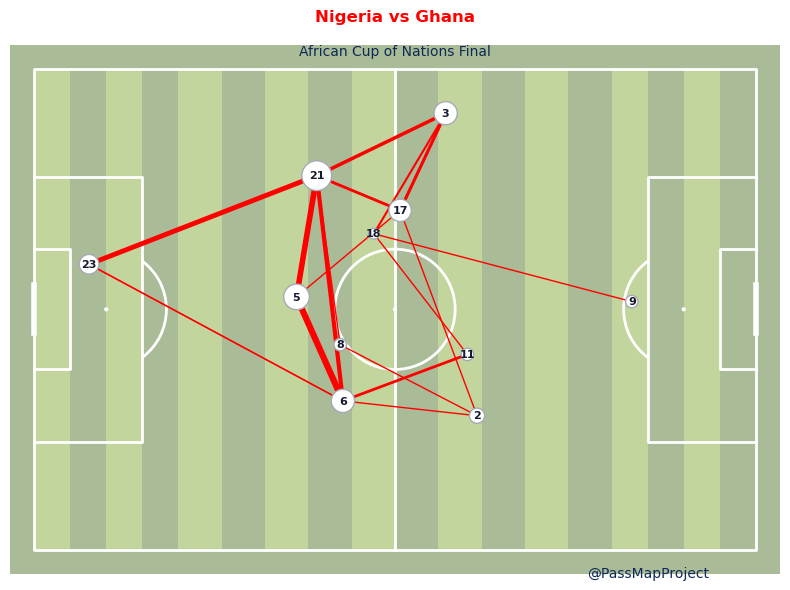

In [70]:
pitch = Pitch(pitch_color='#aabb97', line_color='white',
              stripe_color='#c2d59d', stripe=True)  # optional stripes

fig,ax = pitch.draw(figsize=(8,6))

#Draw arrows and nodes
# arrows = pitch.arrows(1.2*pass_between.x,0.8*pass_between.y,1.2*pass_between.x_end,0.8*pass_between.y_end,ax=ax,color='red',alpha=0.4,width=3)
pass_lines = pitch.lines(1.2*pass_between.x, 0.8*pass_between.y,
                         1.2*pass_between.x_end, 0.8*pass_between.y_end, lw=pass_between.pass_count*0.5,
                         color='red', zorder=1, ax=ax)

nodes = pitch.scatter(1.2*average_locations.x,0.8*average_locations.y,s=20*average_locations['count'].values,color='white',edgecolors='#a6aab3',linewidth=1,ax=ax)


# Put jersey number in the nodes

for index,row in average_locations.iterrows():
    pitch.annotate(index,xy=(1.2*row.x,0.8*row.y),c='#161A30', fontweight='bold',va='center',ha='center',size=8, ax=ax)

    
ax.set_title('Nigeria vs Ghana',color='red',va='center',ha='center',fontsize=12,fontweight='bold',pad=20)

ax.annotate('African Cup of Nations Final', xy=(0.5, 1), xytext=(0, 0),
             xycoords='axes fraction', textcoords='offset points',
             fontsize=10, color='#0E2954', va='top', ha='center')

ax.text(102, 85, '@PassMapProject', color='#0E2959', va='bottom', ha='center', fontsize=10)
plt.show()
